# Masking and reducing datacubes using geometry objects

In [1]:
import matplotlib.pyplot as plt

from earthkit import climate as ek_climate
from earthkit import data as ek_data

from earthkit.data.testing import earthkit_remote_test_data_file

In [2]:
# Get some demonstration ERA5 data, this could be any url or path to an ERA5 grib or netCDF file.
remote_era5_file = earthkit_remote_test_data_file("test-data", "era5_temperature_europe_2015.grib")
era5_data = ek_data.from_source("url", remote_era5_file)
era5_data.to_xarray()

<xarray.Dataset>
Dimensions:     (number: 1, time: 1460, step: 1, surface: 1, latitude: 201,
                 longitude: 281)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude   (longitude) float64 -10.0 -9.75 -9.5 -9.25 ... 59.5 59.75 60.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-08-24T14:12 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
# Use some demonstration polygons stored, this could be any url or path to geojson file
remote_nuts_url = earthkit_remote_test_data_file("test-data", "NUTS_RG_60M_2021_4326_LEVL_0.geojson")
nuts_data = ek_data.from_source("url", remote_nuts_url)
nuts_data

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DK,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((15.16290 55.09370, 15.09400 54..."
1,RS,RS,0,RS,Serbia,Srbija/Сpбија,0,0,0,RS,"POLYGON ((21.47920 45.19300, 21.35850 44.82160..."
2,EE,EE,0,EE,Eesti,Eesti,0,0,0,EE,"MULTIPOLYGON (((27.35700 58.78710, 27.64490 57..."
3,EL,EL,0,EL,Elláda,Ελλάδα,0,0,0,EL,"MULTIPOLYGON (((28.07770 36.11820, 27.86060 35..."
4,ES,ES,0,ES,España,España,0,0,0,ES,"MULTIPOLYGON (((4.39100 39.86170, 4.19070 39.7..."
5,FI,FI,0,FI,Suomi/Finland,Suomi/Finland,0,0,0,FI,"MULTIPOLYGON (((28.89670 69.04260, 28.47820 68..."
6,FR,FR,0,FR,France,France,0,0,0,FR,"MULTIPOLYGON (((55.84980 -21.18580, 55.78580 -..."
7,HR,HR,0,HR,Hrvatska,Hrvatska,0,0,0,HR,"MULTIPOLYGON (((17.65150 45.84780, 17.91210 45..."
8,HU,HU,0,HU,Magyarország,Magyarország,0,0,0,HU,"POLYGON ((22.12110 48.37830, 22.15530 48.40340..."
9,IE,IE,0,IE,Éire/Ireland,Éire/Ireland,0,0,0,IE,"POLYGON ((-7.18850 54.33770, -6.86420 54.33020..."


## Mask dataarray with geodataframe

In [14]:
masked_data = ek_climate.shapes.masks(era5_data, nuts_data)
masked_data

<xarray.DataArray 't2m' (FID: 37, number: 1, time: 1460, step: 1, surface: 1,
                         latitude: 201, longitude: 281)>
array([[[[[[[nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            ...,
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan]]]],



         [[[[nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            ...,
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan]]]],



...



         [[[[nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            ...,
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan]]]],



         [[[[nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            ...,
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan]]]]]]], dtype=float32)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 80.0 79.75 79.5 79.25 ... 30.5 30.25 30.0
  * longitude   (longitude) float64 -10.0 -9.75 -9.5 -9.25 ... 59.5 59.75 60.0
    valid_time  (time, step) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
  * FID         (FID) object 'DK' 'RS' 'EE' 'EL' 'ES' ... 'CY' 'CZ' 'DE' 'NO'
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      56481
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

Text(0.5, 1.0, 'Masked Germany Zoom')

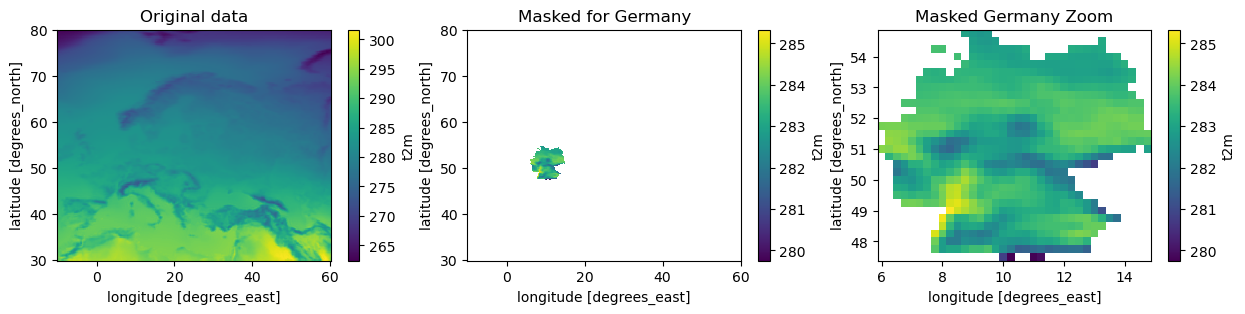

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
era5_data.to_xarray().t2m.mean(dim='time').plot(ax=axes[0])
axes[0].set_title('Original data')
masked_data.sel(FID='DE').mean(dim='time').plot(ax=axes[1])
axes[1].set_title('Masked for Germany')
germany_data = masked_data.sel(FID='DE').dropna(dim='latitude', how='all').dropna(dim='longitude', how='all')
germany_data.mean(dim='time').plot(ax=axes[2])
axes[2].set_title('Masked Germany Zoom')

## Reduce data
### Default behaviour inserts reduced data into geodataframe
[An] additional column[s] is[/are] added to the geodataframe which contains an xarray.DataArray of the reduced data. The column header is constructed from the variable name and the how method applied

In [6]:
reduced_data = ek_climate.shapes.reduce(era5_data, nuts_data)
reduced_data.iloc[:5]

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,t2m_mean
0,DK,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((15.16290 55.09370, 15.09400 54...","[278.70923, 279.765, 279.77222, 279.57568, 279..."
1,RS,RS,0,RS,Serbia,Srbija/Сpбија,0,0,0,RS,"POLYGON ((21.47920 45.19300, 21.35850 44.82160...","[257.4673, 256.88065, 264.83875, 263.44513, 26..."
2,EE,EE,0,EE,Eesti,Eesti,0,0,0,EE,"MULTIPOLYGON (((27.35700 58.78710, 27.64490 57...","[275.7629, 275.43472, 275.91312, 276.8525, 277..."
3,EL,EL,0,EL,Elláda,Ελλάδα,0,0,0,EL,"MULTIPOLYGON (((28.07770 36.11820, 27.86060 35...","[274.514, 273.25146, 275.95157, 273.73346, 272..."
4,ES,ES,0,ES,España,España,0,0,0,ES,"MULTIPOLYGON (((4.39100 39.86170, 4.19070 39.7...","[273.99857, 272.70166, 282.6711, 278.778, 274...."


In [7]:
reduced_data.attrs

{'t2m_attrs': {'GRIB_paramId': 167,
  'GRIB_dataType': 'an',
  'GRIB_numberOfPoints': 56481,
  'GRIB_typeOfLevel': 'surface',
  'GRIB_stepUnits': 1,
  'GRIB_stepType': 'instant',
  'GRIB_gridType': 'regular_ll',
  'GRIB_NV': 0,
  'GRIB_Nx': 281,
  'GRIB_Ny': 201,
  'GRIB_cfName': 'unknown',
  'GRIB_cfVarName': 't2m',
  'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid',
  'GRIB_iDirectionIncrementInDegrees': 0.25,
  'GRIB_iScansNegatively': 0,
  'GRIB_jDirectionIncrementInDegrees': 0.25,
  'GRIB_jPointsAreConsecutive': 0,
  'GRIB_jScansPositively': 0,
  'GRIB_latitudeOfFirstGridPointInDegrees': 80.0,
  'GRIB_latitudeOfLastGridPointInDegrees': 30.0,
  'GRIB_longitudeOfFirstGridPointInDegrees': -10.0,
  'GRIB_longitudeOfLastGridPointInDegrees': 60.0,
  'GRIB_missingValue': 9999,
  'GRIB_name': '2 metre temperature',
  'GRIB_shortName': '2t',
  'GRIB_totalNumber': 0,
  'GRIB_units': 'K',
  'long_name': '2 metre temperature',
  'units': 'K',
  'standard_name': 'unknown'},
 't2m_me

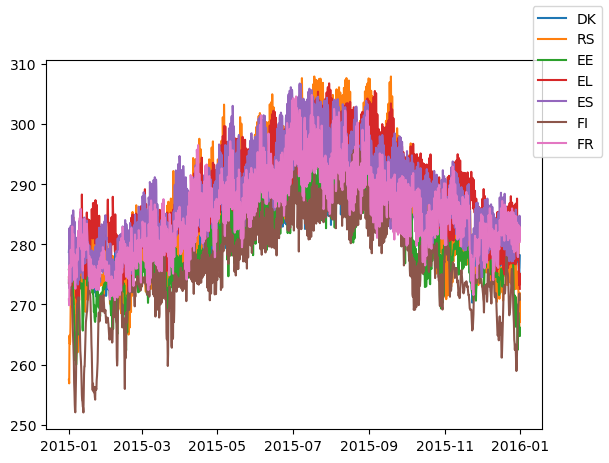

In [8]:
plot_var = "t2m_mean"
plot_x_vals = reduced_data.attrs[f"{plot_var}_dims"]["time"]
fig, ax = plt.subplots(1)
for i, feature in reduced_data.iterrows():
    ax.plot(plot_x_vals, feature['t2m_mean'].squeeze(), label=feature['FID'])
    # feature['t2m_mean'].plot(ax=ax, label=feature['FID'])
    if i>5:
        break
fig.legend()

## Can provide additional dimensions to reduce along

This is advisable with such analysis as it ensures correctly handled and weihted missing values

In [9]:
reduced_data = ek_climate.shapes.reduce(era5_data, nuts_data, extra_reduce_dims='time')
reduced_data.iloc[:5]

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,t2m_mean
0,DK,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((15.16290 55.09370, 15.09400 54...",282.48444
1,RS,RS,0,RS,Serbia,Srbija/Сpбија,0,0,0,RS,"POLYGON ((21.47920 45.19300, 21.35850 44.82160...",285.00317
2,EE,EE,0,EE,Eesti,Eesti,0,0,0,EE,"MULTIPOLYGON (((27.35700 58.78710, 27.64490 57...",280.56302
3,EL,EL,0,EL,Elláda,Ελλάδα,0,0,0,EL,"MULTIPOLYGON (((28.07770 36.11820, 27.86060 35...",288.2147
4,ES,ES,0,ES,España,España,0,0,0,ES,"MULTIPOLYGON (((4.39100 39.86170, 4.19070 39.7...",287.7985


### TODO: Use earthkit polygon plotting here

## Can provide weights for reduction

Or use predefined weights options, i.e. `latitude`

In [ ]:
import numpy as np

reduced_data_xr = ek_climate.shapes.reduce(era5_data, nuts_data, weights='latitude')
reduced_data_xr

## Can return the object as an xarray

TODO: how to attach to original geometry?

In [11]:
import numpy as np

reduced_data_xr = ek_climate.shapes.reduce(era5_data, nuts_data, how=np.nanmax, weights='latitude', return_as='xarray')
reduced_data_xr

/Users/edwardcomyn-platt/miniconda3/envs/earthkit/lib/python3.10/site-packages/xarray/core/variable.py:2002: RuntimeWarning: All-NaN slice encountered
  data = func(self.data, axis=axis, **kwargs)
/Users/edwardcomyn-platt/miniconda3/envs/earthkit/lib/python3.10/site-packages/xarray/core/variable.py:2002: RuntimeWarning: All-NaN slice encountered
  data = func(self.data, axis=axis, **kwargs)


<xarray.DataArray 't2m' (FID: 37, time: 1460)>
array([[279.88135, 280.61102, 281.33185, ..., 277.7212 , 280.78748,
        281.04398],
       [264.86768, 266.3454 , 269.08966, ..., 268.93408, 273.9906 ,
        269.51077],
       [277.11377, 277.34735, 277.97247, ..., 271.02783, 271.52966,
        270.31937],
       ...,
       [274.09814, 275.03876, 276.59552, ..., 269.32666, 273.7621 ,
        271.876  ],
       [280.16846, 279.87665, 278.94513, ..., 281.21338, 283.03357,
        282.04788],
       [281.73486, 282.1579 , 281.6502 , ..., 281.2251 , 280.1527 ,
        280.6592 ]], dtype=float32)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
  * FID         (FID) object 'DK' 'RS' 'EE' 'EL' 'ES' ... 'CY' 'CZ' 'DE' 'NO'
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      56481
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

In [12]:
reduced_data_xr.to_netcdf('test_data/test_reduced.nc')

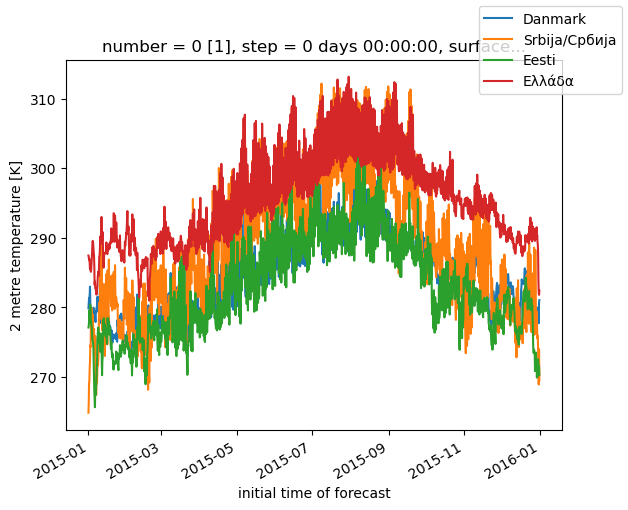

In [13]:
fig, ax = plt.subplots(1)
for feature in nuts_data[:4]:
    reduced_data_xr.sel(FID=feature["FID"]).plot(ax=ax, label=feature["NUTS_NAME"])

fig.legend()
